# Gaussian Mixture Models

**Mixture Models** are probability density models that assume the underlying data is a mix of different probability distributions.  These component distributions are combined into a new probability density function that is usually multi-modal.

Example: Modelling the spending habits of everyone in America.  It would be helpful to use a mixture model; come up with a distribution for each state and territory, then combine them to describe the country at large so we don't miss the nuances of each  state.

Mixture models are semi-parametric; they make some assumptions about the underlying functions.  They're useful for sparse data, too.

**Gaussian Mixture Models** are mixture models whose component distributions are all **Gaussian distributions**.  They're powerful and have many practical applications.

In [29]:
import numpy
from matplotlib import pyplot, patches
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

## The Iris Dataset

In [30]:
iris = datasets.load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Splitting the Dataset

This time we're splitting the data into five subsets.  Four for training, one for testing.  Each training subset is supposed to be its own distribution.

In [35]:
kfold = StratifiedKFold(n_splits=5)

indices = kfold.split(numpy.zeros(len(iris.target)), iris.target)
train_indices, test_indices = next(iter(indices))

data_train, class_train = iris.data[train_indices], iris.target[train_indices]
data_test, class_test = iris.data[test_indices], iris.target[test_indices]
classes = numpy.unique(class_train)
num_classes = len(classes)

## Building the Classifier

- `n_components` refers to the number of underlying probability distributions (in our case, one per class)
- `n_iter` refers to the number of Expectation-Maximization iterations that will be run during training
- I don't know what `full` covariance means.

In [75]:
classifier = GaussianMixture(n_components=num_classes, covariance_type="full", max_iter=100)
classifier.means_ = numpy.array([data_train[class_train == i].mean(axis=0) for i in range(num_classes)])
classifier.fit(data_train)

training_predictions = classifier.predict(data_train)
accuracy_train = numpy.mean(training_predictions.ravel() == class_train.ravel()) * 100

test_predictions = classifier.predict(data_test)
accuracy_test = numpy.mean(test_predictions.ravel() == class_test.ravel()) * 100

print("Accuracy on Training Data: {:.2f}".format(accuracy_train))
print("Accuracy on Test Data: {:.2f}".format(accuracy_test))

Accuracy on Training Data: 33.33
Accuracy on Test Data: 33.33


## Visualizing Classifier Boundaries

This involves eigenvalues and eigenvectors.  See [here](https://www.math.hmc.edu/calculus/tutorials/eigenstuff) for a refresher.  Remember AMS 210?

/usr/lib/python3/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


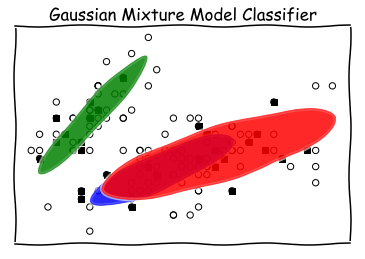

In [76]:
pyplot.figure()
colors = 'bgr'
covars = classifier.covariances_
means = classifier.means_

for i, color in enumerate(colors):
    eigenvalues, eigenvectors = numpy.linalg.eigh(covars[i][:2, :2])
    normalized = eigenvectors[0] / numpy.linalg.norm(eigenvectors[0])
    
    angle = numpy.arctan2(normalized[1], normalized[0])
    angle = 180 * angle / numpy.pi
    
    eigenvalues *= 8
    
    ellipse = patches.Ellipse(means[i, :2], eigenvalues[0], eigenvalues[1], 180 + angle, color=color)
    axis_handle = pyplot.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

    label = iris.target_names[i]
    current_data = iris.data[iris.target == i]
    test_data = data_test[class_test == i]
    
    pyplot.scatter(current_data[:, 0], current_data[:, 1], marker='o', facecolors='none', edgecolors='black', s=40, label=label)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], marker='s', facecolors='black', edgecolors='black', s=40, label=label)

pyplot.title("Gaussian Mixture Model Classifier")
pyplot.xticks(())
pyplot.yticks(())
pyplot.show()